In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import ast

In [3]:
def str2list(a):
    if a == "Error: Unable to retrieve README for url. Status code: 404":
        return []
    else:
        return ast.literal_eval(a)

In [50]:
input_file = "../../rs_usage/metadata/metadata.csv"
metadata = pd.read_csv(input_file, low_memory=False)
metadata.set_index('Unnamed: 0', inplace=True)
forks = metadata["forks_count"]

In [4]:
input_file = "../../rs_usage/info_repos/release/release.csv"
release = pd.read_csv(input_file, low_memory=False)
release.rename({"Unnamed: 0": "id", "url": "release"}, axis=1, inplace=True)
release["release"] = release["release"].apply(str2list)

In [5]:
release["release_number"] = release["release"].apply(lambda x: len(x))

In [42]:
hist_name, hist_count = np.unique(release["release_number"], return_counts=True)
hist_name = [str(i) for i in hist_name]
numerous_releases = np.sum(hist_count[10:])
hist_name = hist_name[:10]
hist_count = hist_count[:10]
hist_name[-1] = "10+"
hist_count[-1] = numerous_releases

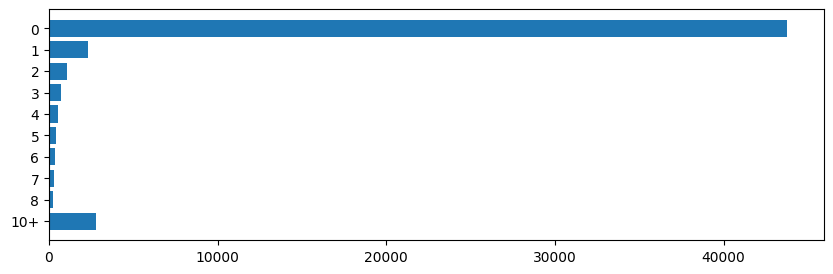

In [46]:
fig, axs = plt.subplots(figsize=(10, 3))
axs.barh(y=hist_name, width=hist_count)
axs.yaxis.set_inverted(True)

Text(0, 0.5, 'Release count')

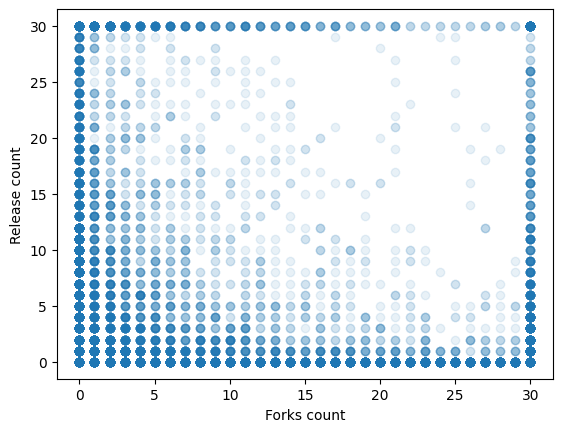

In [56]:
fig, ax = plt.subplots()
ax.scatter(forks,release["release_number"], alpha=0.1)
ax.set_xlabel("Forks count")
ax.set_ylabel("Release count")

In [51]:
forks = np.where(forks>30, 30, forks)

In [53]:
release["release_number"]

0         1
1         0
2         0
3         2
4         0
         ..
52679     0
52680    16
52681     0
52682     0
52683     0
Name: release_number, Length: 52684, dtype: int64